In [85]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import csv

#plotly libraries
import plotly as py
import plotly.graph_objs as go

py.offline.init_notebook_mode(connected=True)

In [2]:
csv_path = "../../00_Project_Python_Data_Resources/Original CO2 emissions dataset.csv"
CO2data_df = pd.read_csv(csv_path, encoding = 'unicode_escape')
CO2data_df.head()

,Country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,0.41388,0.49080,0.68859,0.70674,0.83855,1.0069,1.0912,1.28190,1.2234,...,4.19830,6.76030,8.45220,12.22600,10.74210,10.00040,9.78920,10.10740,12.25790,13.01470
1,Albania,2.02250,2.27900,2.46220,2.08120,2.01520,2.1728,2.5501,2.67840,3.0704,...,4.37120,4.37480,4.59470,5.23590,4.90610,5.06000,5.71220,5.94770,6.27290,6.37920
2,Algeria,6.15120,6.05590,5.66100,5.41920,5.64300,6.5885,8.4209,8.43160,9.0502,...,109.03180,120.18590,117.81410,119.80690,128.11000,132.43460,143.17710,150.59250,150.37800,150.55140
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.53861,0.51662,0.51662,0.49098,0.48731,0.47632,0.46166,0.47724,0.51151,0.52018
4,Angola,0.54895,0.45371,1.17910,1.14970,1.22290,1.1862,1.5525,0.99181,1.6695,...,25.48600,27.56550,28.86450,30.14210,33.18580,32.37310,34.45760,34.76110,35.35100,35.38990


In [3]:
CO2data_df_headers=list(CO2data_df.columns.values)
CO2data_df_years = CO2data_df_headers[-59:]
CO2data_df_years_drop = CO2data_df_years[1:51]
CO2data_df_1= CO2data_df.drop(CO2data_df_years_drop,axis=1)
CO2data_df_1.head()

,Country,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,8.45220,12.22600,10.74210,10.00040,9.78920,10.10740,12.25790,13.01470
1,Albania,4.59470,5.23590,4.90610,5.06000,5.71220,5.94770,6.27290,6.37920
2,Algeria,117.81410,119.80690,128.11000,132.43460,143.17710,150.59250,150.37800,150.55140
3,Andorra,0.51662,0.49098,0.48731,0.47632,0.46166,0.47724,0.51151,0.52018
4,Angola,28.86450,30.14210,33.18580,32.37310,34.45760,34.76110,35.35100,35.38990


In [4]:
CO2data_df_2 = CO2data_df_1.sort_values(by=['2017'],ascending=False)
CO2data_df_2 = CO2data_df_2.loc[:,:'2017'].round(0)
CO2data_df_2.head(10)

,Country,2010,2011,2012,2013,2014,2015,2016,2017
41,China,8501.0,9388.0,9634.0,9797.0,9820.0,9716.0,9704.0,9839.0
209,United States of America,5701.0,5571.0,5367.0,5520.0,5569.0,5421.0,5311.0,5270.0
91,India,1700.0,1817.0,1984.0,1998.0,2208.0,2276.0,2377.0,2467.0
163,Russian Federation,1658.0,1712.0,1726.0,1666.0,1667.0,1672.0,1668.0,1693.0
99,Japan,1212.0,1261.0,1302.0,1314.0,1264.0,1224.0,1204.0,1205.0
75,Germany,834.0,811.0,815.0,833.0,794.0,797.0,802.0,799.0
93,Iran,564.0,579.0,601.0,609.0,639.0,630.0,638.0,672.0
172,Saudi Arabia,518.0,498.0,563.0,541.0,602.0,621.0,632.0,635.0
183,South Korea,566.0,588.0,584.0,592.0,587.0,591.0,595.0,616.0
35,Canada,555.0,561.0,564.0,569.0,568.0,566.0,558.0,573.0


In [5]:
Country = CO2data_df_2.set_index('Country')
df_plot_by_country = Country.T
df_plot_by_country

Country,China,United States of America,India,Russian Federation,Japan,Germany,Iran,Saudi Arabia,South Korea,Canada,...,Niue,Saint Helena,Cayman Islands,Falkland Islands (Malvinas),French Guiana,Gibraltar,Guadeloupe,Martinique,Runion,Western Sahara
2010,8501.0,5701.0,1700.0,1658.0,1212.0,834.0,564.0,518.0,566.0,555.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011,9388.0,5571.0,1817.0,1712.0,1261.0,811.0,579.0,498.0,588.0,561.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012,9634.0,5367.0,1984.0,1726.0,1302.0,815.0,601.0,563.0,584.0,564.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,9797.0,5520.0,1998.0,1666.0,1314.0,833.0,609.0,541.0,592.0,569.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,9820.0,5569.0,2208.0,1667.0,1264.0,794.0,639.0,602.0,587.0,568.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,9716.0,5421.0,2276.0,1672.0,1224.0,797.0,630.0,621.0,591.0,566.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016,9704.0,5311.0,2377.0,1668.0,1204.0,802.0,638.0,632.0,595.0,558.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017,9839.0,5270.0,2467.0,1693.0,1205.0,799.0,672.0,635.0,616.0,573.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_plot_by_country.index

Index(['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'], dtype='object')

In [7]:
list_of_countries = list(df_plot_by_country.columns)

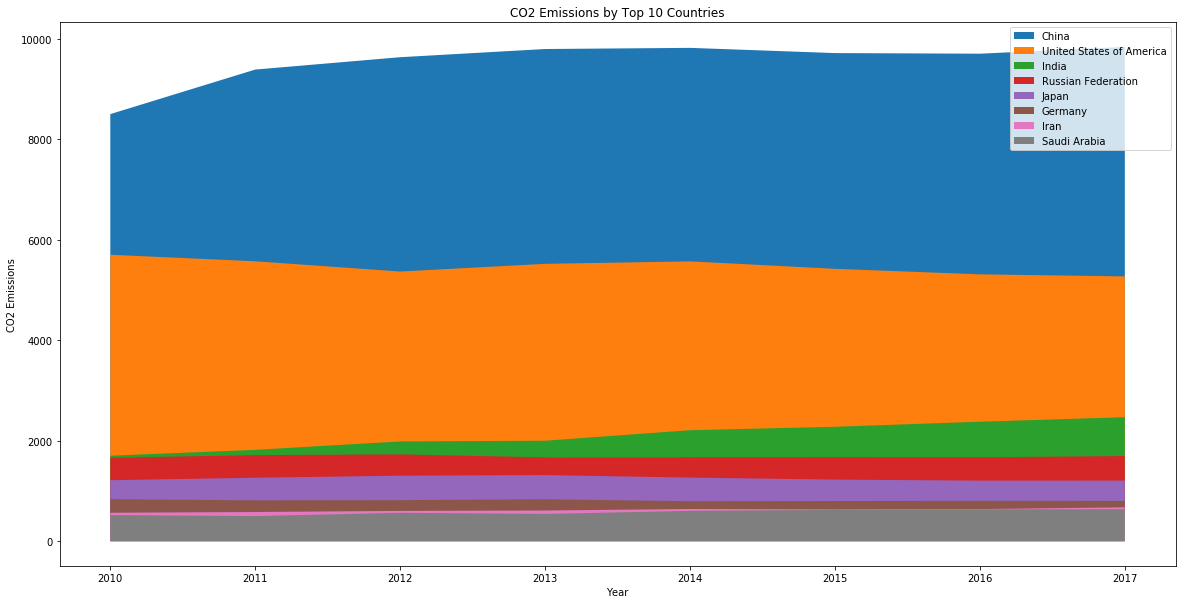

In [216]:
# library
#import numpy as np
#import matplotlib.pyplot as plt
#import seaborn as sns
#don't need to import libraries twice

china = list(df_plot_by_country['China'])
usa = list(df_plot_by_country['United States of America'])
india = list(df_plot_by_country['India'])
russian = list(df_plot_by_country['Russian Federation'])
japan = list(df_plot_by_country['Japan'])
germany = list(df_plot_by_country['Germany'])
iran = list(df_plot_by_country['Iran'])
saudiarabia = list(df_plot_by_country['Saudi Arabia'])
    
plt.figure(figsize=(20,10))

plt.fill_between(df_plot_by_country.index, china)
plt.fill_between(df_plot_by_country.index, usa)
plt.fill_between(df_plot_by_country.index, india)
plt.fill_between(df_plot_by_country.index, russian)
plt.fill_between(df_plot_by_country.index, japan)
plt.fill_between(df_plot_by_country.index, germany)
plt.fill_between(df_plot_by_country.index, iran)
plt.fill_between(df_plot_by_country.index, saudiarabia)

plt.title("CO2 Emissions by Top 10 Countries")
plt.xlabel("Year")
plt.ylabel("CO2 Emissions")

plt.legend(['China', 'United States of America', 'India', 'Russian Federation', 'Japan', 'Germany', 'Iran', 'Saudi Arabia'])

plt.savefig("../Project_1_AirPollution_vs_GDPperCapita/CO2_Emissions_by_Countries.png")

plt.show()



### <font color = 'green'> Josefina Amaro - Assistance with Data Visualization & Data Restructuring </font>

In [157]:
#instead of choosing 10 countries I would have the data pull it for you

#create total columns
CO2data_df_2['Total C02 Emissions'] = CO2data_df_2.sum(axis = 1)

#drop NAN countries
CO2data_totals_df = CO2data_df_2.dropna()

#pull top 10
CO2data_totals_df = CO2data_totals_df.sort_values(by ='Total C02 Emissions', ascending=False )
CO2data_top_countries = CO2data_totals_df.head(10)
CO2data_top_countries

,Country,2010,2011,2012,2013,2014,2015,2016,2017,Total C02 Emissions
41,China,8501.0,9388.0,9634.0,9797.0,9820.0,9716.0,9704.0,9839.0,1298783.0
209,United States of America,5701.0,5571.0,5367.0,5520.0,5569.0,5421.0,5311.0,5270.0,743410.0
91,India,1700.0,1817.0,1984.0,1998.0,2208.0,2276.0,2377.0,2467.0,286059.0
163,Russian Federation,1658.0,1712.0,1726.0,1666.0,1667.0,1672.0,1668.0,1693.0,228854.0
99,Japan,1212.0,1261.0,1302.0,1314.0,1264.0,1224.0,1204.0,1205.0,169762.0
75,Germany,834.0,811.0,815.0,833.0,794.0,797.0,802.0,799.0,110245.0
93,Iran,564.0,579.0,601.0,609.0,639.0,630.0,638.0,672.0,83844.0
183,South Korea,566.0,588.0,584.0,592.0,587.0,591.0,595.0,616.0,80223.0
172,Saudi Arabia,518.0,498.0,563.0,541.0,602.0,621.0,632.0,635.0,78370.0
35,Canada,555.0,561.0,564.0,569.0,568.0,566.0,558.0,573.0,76738.0


In [135]:
# edit top 10 countries for graphing
CO2data_top_countries_edit = CO2data_top_countries.drop('Total C02 Emissions', axis=1)
CO2data_top_countries = CO2data_top_countries_edit.replace({'United States of America': 'U.S.A','Russian Federation':'Russia'})
CO2data_top_countries_value_edit = (CO2data_top_countries.iloc[:,1:] /100).astype(int) * 100
CO2data_top_countries_value_edit['Country']  = CO2data_top_countries['Country']
CO2data_top_countries_value_edit= CO2data_top_countries_value_edit.set_index('Country').reset_index()
CO2data_top_countries_value_edit

,Country,2010,2011,2012,2013,2014,2015,2016,2017
0,China,8500,9300,9600,9700,9800,9700,9700,9800
1,U.S.A,5700,5500,5300,5500,5500,5400,5300,5200
2,India,1700,1800,1900,1900,2200,2200,2300,2400
3,Russia,1600,1700,1700,1600,1600,1600,1600,1600
4,Japan,1200,1200,1300,1300,1200,1200,1200,1200
5,Germany,800,800,800,800,700,700,800,700
6,Iran,500,500,600,600,600,600,600,600
7,South Korea,500,500,500,500,500,500,500,600
8,Saudi Arabia,500,400,500,500,600,600,600,600
9,Canada,500,500,500,500,500,500,500,500


In [ ]:
#source[round to nearest 100]: https://stackoverflow.com/questions/46020761/pandas-numpy-round-down-to-nearest-100

In [136]:
#country labels 
country_labels = list(CO2data_top_countries_value_edit.iloc[:,0])
country_labels

['China',
 'U.S.A',
 'India',
 'Russia',
 'Japan',
 'Germany',
 'Iran',
 'South Korea',
 'Saudi Arabia',
 'Canada']

In [137]:
#iterate through years to get data by country
y_axis =  []

for index,row in CO2data_top_countries_value_edit.iloc[:,1:].iterrows():
    y_axis.append(row.values)   

In [138]:
# 8 x 10 (CO2 per year x countries)
y_axis

[array([8500, 9300, 9600, 9700, 9800, 9700, 9700, 9800]),
 array([5700, 5500, 5300, 5500, 5500, 5400, 5300, 5200]),
 array([1700, 1800, 1900, 1900, 2200, 2200, 2300, 2400]),
 array([1600, 1700, 1700, 1600, 1600, 1600, 1600, 1600]),
 array([1200, 1200, 1300, 1300, 1200, 1200, 1200, 1200]),
 array([800, 800, 800, 800, 700, 700, 800, 700]),
 array([500, 500, 600, 600, 600, 600, 600, 600]),
 array([500, 500, 500, 500, 500, 500, 500, 600]),
 array([500, 400, 500, 500, 600, 600, 600, 600]),
 array([500, 500, 500, 500, 500, 500, 500, 500])]

In [139]:
#source['iterate over columns and rows']: https://stackoverflow.com/questions/7837722/what-is-the-most-efficient-way-to-loop-through-dataframes-with-pandas

In [140]:
years = list(CO2data_top_countries_value_edit.iloc[:,1:])
len(years)
years

['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']

In [141]:
#8 x 10 (years by countries)

x_axis = years
x_axis_1 = x_axis
x_axis_data = [list(x_axis) for contents in zip(x_axis,x_axis_1)]
x_axis_data.append(x_axis)
x_axis_data.append(x_axis) 
x_axis_data

[['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'],
 ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'],
 ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'],
 ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'],
 ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'],
 ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'],
 ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'],
 ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'],
 ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'],
 ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']]

In [142]:
#source['copy two lists and make into sublist']: https://stackoverflow.com/questions/6563711/python-how-do-i-merge-lists-to-create-a-nested-list

In [143]:
#checking same # of x and y axis
len(y_axis)

10

In [144]:
len(x_axis_data)

10

In [145]:
x_axis_data[9][7]

'2017'

#### Graph by plotly

In [210]:
title = 'CO2 Emissions by Country'
labels = country_labels

#10 colors for countries
colors = ['#ba2f2c','#dd9311','#f7f404','#61a316','#08918f','#5b1cd8','#9411a0','#c43153','#63c9e2','#855aa8']

x_data = x_axis_data
y_data = y_axis

traces= []

i = 0
j = 0

for i in range(0, 9):
    traces.append(go.Scatter(
        x=x_data[i],
        y=y_data[i],
        mode='lines',
        name= labels[i],
        line=dict(color=colors[i], width=2),
        connectgaps=True,
    ))
    
layout = go.Layout(
    xaxis=dict(
        showline=True,
        showgrid=False,
        showticklabels=True,
        linecolor='rgb(204, 204, 204)',
        linewidth=2,
        ticks='outside',
        tickcolor='rgb(204, 204, 204)',
        tickwidth=2,
        ticklen=5,
        tickfont=dict(
            family='Arial',
            size=12,
            color='rgb(82, 82, 82)',
        ),
    ),
    yaxis=dict(
        showgrid=True,
        zeroline=False,
        showline=False,
        showticklabels=True,
        #autorange=True
        
    ),
    autosize=True,
    margin=dict(
        autoexpand=True,
        l=100,
        r=20,
        t=110,
    ),
    showlegend=True
)

annotations = []

# Adding labels
for y_trace, label, color in zip(y_data, labels, colors):

# Title
 annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='CO2 Emissions by Country',
                              font=dict(family='Constantia',
                                        size=20,
                                        color='#075a91'),
                              showarrow=False))

layout['annotations'] = annotations

fig = go.Figure(data=traces, layout=layout)
py.offline.iplot(fig)    